## Decision Tree for Predictive Modeling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/shopping_trends.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
corr_matrix = data.corr()
print(corr_matrix)

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


C:\Users\2001s\AppData\Local\Temp\ipykernel_18380\2599440078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [6]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

<Axes: xlabel='Frequency of Purchases', ylabel='count'>

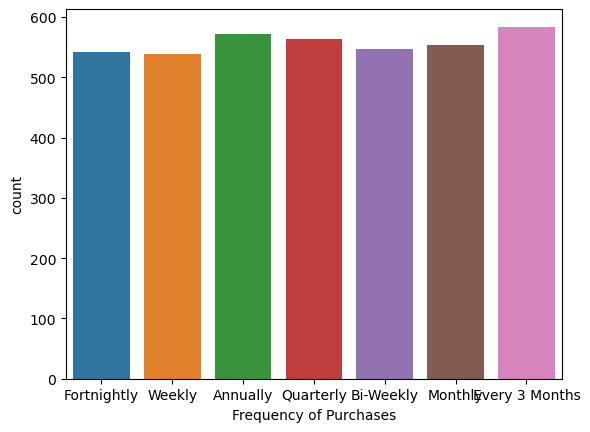

In [7]:
sns.countplot(x='Frequency of Purchases', data=data)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Item Purchased'] = le.fit_transform(data['Item Purchased'])
data['Previous Purchases'] = le.fit_transform(data['Previous Purchases'])
data['Category'] = le.fit_transform(data['Category'])
data['Season'] = le.fit_transform(data['Season'])
data['Frequency of Purchases'] = le.fit_transform(data['Frequency of Purchases'])


In [9]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,Kentucky,L,Gray,3,3.1,Yes,Credit Card,Express,Yes,Yes,13,Venmo,3
1,2,19,1,23,1,64,Maine,L,Maroon,3,3.1,Yes,Bank Transfer,Express,Yes,Yes,1,Cash,3
2,3,50,1,11,1,73,Massachusetts,S,Maroon,1,3.1,Yes,Cash,Free Shipping,Yes,Yes,22,Credit Card,6
3,4,21,1,14,2,90,Rhode Island,M,Maroon,1,3.5,Yes,PayPal,Next Day Air,Yes,Yes,48,PayPal,6
4,5,45,1,2,1,49,Oregon,M,Turquoise,1,2.7,Yes,Cash,Free Shipping,Yes,Yes,30,PayPal,0


In [10]:
x = data[['Age','Gender','Item Purchased','Category','Previous Purchases','Season','Review Rating']]
y = data['Frequency of Purchases']

In [11]:
from sklearn.model_selection import train_test_split
# spliting train and test dataset
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.25,random_state = 2)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
dt_class.fit(xtrain,ytrain)

print('Hyperparameter:\n',dt_class.get_params())
print()

ypred = dt_class.predict(xtest)

print('Predicted class labels for the test samples:\n',ypred)
print()

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# performance metric

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Predicted class labels for the test samples:
 [0 4 3 3 5 5 2 1 1 0 3 4 1 4 0 1 0 3 1 0 4 4 5 2 1 0 5 2 5 6 0 5 2 5 1 4 4
 2 1 3 1 3 1 5 6 2 4 6 4 3 6 5 6 2 4 5 0 6 2 4 6 4 3 1 3 2 5 4 2 0 5 6 0 5
 5 5 5 6 3 4 0 4 3 5 3 3 3 4 4 6 5 1 5 3 4 2 4 0 3 0 3 4 1 6 4 2 3 5 0 0 3
 0 4 3 4 5 5 4 1 5 0 2 2 4 4 0 1 5 0 3 3 6 2 6 0 3 4 1 5 6 4 0 4 0 4 6 3 3
 2 1 1 0 5 3 4 5 4 3 6 6 4 2 0 4 4 6 6 6 2 5 1 2 4 2 1 1 1 3 0 0 6 0 5 1 5
 2 4 5 0 0 2 3 4 6 5 5 6 3 1 1 3 5 1 1 3 3 1 6 0 6 4 3 6 3 0 4 5 2 3 5 1 5
 6 5 1 3 5 1 6 5 0 0 5 6 5 3 1 1 1 3 0 3 3 0 5 4 1 6 3 4 2 2 3 5 4 3 6 2 5
 5 5 4 5 2 0 0 3 3 5 5 5 0 5 5 1 0 0 6 6 0 1 1 3 6 2 3 2 5 3 1 0 3 2 5 0 3
 3 4 1 2 4 3 1 4 1 2 1 6 5 2 5 2 1 4 1 3 3 4 1 2 1 6 0 0 

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(xtrain,ytrain)

print('Hyperparameter:\n',dt_reg.get_params())
print()

ypred = dt_reg.predict(xtest)

print('Predicted class labels for the test samples:\n',ypred)
print()

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# performance metric

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Predicted class labels for the test samples:
 [0. 4. 5. 6. 2. 5. 2. 4. 2. 5. 1. 5. 1. 5. 0. 3. 4. 1. 6. 0. 3. 3. 4. 0.
 5. 6. 0. 6. 3. 5. 5. 5. 2. 5. 5. 6. 1. 0. 2. 4. 1. 6. 6. 3. 0. 2. 0. 0.
 0. 0. 3. 0. 5. 3. 1. 6. 1. 5. 2. 5. 1. 4. 2. 4. 2. 3. 5. 6. 5. 2. 1. 2.
 1. 4. 4. 5. 5. 5. 1. 4. 2. 1. 2. 4. 3. 0. 0. 4. 4. 6. 0. 4. 6. 0. 5. 3.
 4. 1. 3. 2. 6. 5. 6. 4. 5. 1. 5. 4. 5. 0. 1. 0. 5. 1. 4. 1. 4. 4. 1. 2.
 0. 3. 4. 1. 4. 0. 5. 5. 2. 5. 3. 0. 3. 4. 5. 5. 4. 5. 2. 3. 3. 0. 2. 5.
 4. 6. 3. 3. 4. 1. 2. 1. 3. 1. 4. 2. 0. 1. 3. 2. 5. 5. 5. 4. 4. 3. 5. 0.
 2. 2. 5. 1. 4. 1. 2. 4. 0. 1. 1. 0. 6. 3. 6. 0. 3. 6. 4. 5. 0. 0. 4. 4.
 6. 1. 1. 1. 6. 5. 1. 0. 1. 2. 2. 6. 3. 2. 0. 2. 4. 6. 0. 1. 6. 2. 0. 1.
 1. 0. 6. 5. 

In [14]:
print("MSV :\t",mean_squared_error(ytest,ypred))
print()
print('R-Square :\n',r2_score(ytest,ypred))
print()

MSV :	 8.653333333333334

R-Square :
 -1.1539020462668392



[Text(0.3974631203960451, 0.9821428571428571, 'X[4] <= 20.5\ngini = 0.857\nsamples = 2925\nvalue = [431, 410, 435, 389, 432, 436, 392]'),
 Text(0.1542829676804007, 0.9464285714285714, 'X[0] <= 34.5\ngini = 0.856\nsamples = 1236\nvalue = [189, 177, 213, 155, 177, 154, 171]'),
 Text(0.07050574852734129, 0.9107142857142857, 'X[3] <= 0.5\ngini = 0.851\nsamples = 401\nvalue = [49, 68, 82, 56, 49, 48, 49]'),
 Text(0.019719062029679737, 0.875, 'X[0] <= 25.5\ngini = 0.843\nsamples = 126\nvalue = [17, 28, 18, 22, 17, 16, 8]'),
 Text(0.004547440648617157, 0.8392857142857143, 'X[6] <= 2.75\ngini = 0.834\nsamples = 49\nvalue = [9, 4, 6, 10, 6, 11, 3]'),
 Text(0.001035716019613872, 0.8035714285714286, 'X[4] <= 17.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 1, 0, 0, 4, 1]'),
 Text(0.000517858009806936, 0.7678571428571429, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 4, 0]'),
 Text(0.001553574029420808, 0.7678571428571429, 'X[6] <= 2.6\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 1]'),
 T

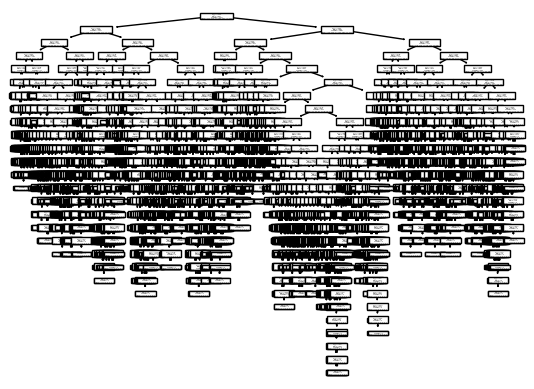

In [15]:
# Visualize the decision tree for classification models
from sklearn import tree


tree.plot_tree(dt_class)

In [18]:
# Feature importance is calculated automatically by Decision Trees
print("Feature Importance (Classification):", dt_class.feature_importances_)
print("Feature Importance (Regression):", dt_reg.feature_importances_)

Feature Importance (Classification): [0.22658404 0.04140016 0.16649595 0.05563036 0.19767157 0.09648238
 0.21573554]
Feature Importance (Regression): [0.26709007 0.04387816 0.17420598 0.0679595  0.17988809 0.08337822
 0.18359998]


In [21]:
# Pruning the Decision Tree
# Pruning can be implemented by setting parameters like max_depth, min_samples_split, min_samples_leaf, or max_leaf_nodes.

clf_pruned = DecisionTreeClassifier(max_depth=3)
clf_pruned.fit(xtrain, ytrain)

# Evaluate the pruned classification model
ypred = clf_pruned.predict(xtest)
print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Accuracy score :	 0.1476923076923077

Confusion Martix :
 [[10  7 22  0 74 28  0]
 [10 15 18  0 77 17  0]
 [ 6 16 14  0 73 40  0]
 [ 9 11 18  0 81 34  0]
 [ 2  6 17  0 75 21  0]
 [10 13 16  0 58 30  0]
 [10 12 17  0 71 37  0]]

classification Report :
               precision    recall  f1-score   support

           0       0.18      0.07      0.10       141
           1       0.19      0.11      0.14       137
           2       0.11      0.09      0.10       149
           3       0.00      0.00      0.00       153
           4       0.15      0.62      0.24       121
           5       0.14      0.24      0.18       127
           6       0.00      0.00      0.00       147

    accuracy                           0.15       975
   macro avg       0.11      0.16      0.11       975
weighted avg       0.11      0.15      0.10       975



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# prune the regression model

reg_pruned = DecisionTreeRegressor(max_depth=3)
reg_pruned.fit(xtrain, ytrain)

# Evaluate the pruned regression model
ypred = reg_pruned.predict(xtest)

print("MSV :\t",mean_squared_error(ytest,ypred))
print()
print('R-Square :\n',r2_score(ytest,ypred))



MSV :	 4.071112843957977

R-Square :
 -0.013341096130696783
